

# Project: Investigate a Dataset - [Noshowappointments]



<a id='intro'></a>
## Introduction

### Dataset Description 

 The dataset examined herby the noshow appointment is giving data about various patients with different medical conditions and who did appear on their appointments or not .we are going to to examine the quality of data included within the dataset make any required cleaning for the data in order to have adataset ready for investigation.Then further processing for the data will be done for gaining required statistics with some graphs to show the gained knowledge.


### Question(s) for Analysis
The examintation will deal with comparison between Males and Females and studying who did show on their appointment and those who didnot and the effect of diabetes on the show or no show. We will go through the dataset for better understanding gained,trying to get better understanding of correlations between various variables

In [4]:
# Importing libraries that will deal with the dataset.

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

In [5]:
#Loading the CSV file that contai the dataset
df= pd.read_csv('noshowappointments.csv')


In [5]:
# Showing abrief Header sample of the dataset for better understanding and better vision of any error within the dataset
df.head(8)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes


In [6]:

df.tail(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110517,5.574942e+12,5780122,F,2016-06-07T07:38:34Z,2016-06-07T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [7]:
# Using shape to recognize the dataset.
df.shape

(110527, 14)

In [8]:
# understanding the different data types of the dataset for better understanding and for error correction in datatypes.
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [9]:
# Showing information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
# Abrief description of the dataset with a brief analysis
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
# Showing dataset unique 
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [12]:
# Examining any duplicate of data within the dataset  which could cause error in handling the dataset.
sum(df.duplicated())

0

In [13]:
# searching dataset for any null value  of any data entry.
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [14]:
# Assurance of the previous step concerning searching dataset for any null value  of any data entry.
df.notnull().sum()

PatientId         110527
AppointmentID     110527
Gender            110527
ScheduledDay      110527
AppointmentDay    110527
Age               110527
Neighbourhood     110527
Scholarship       110527
Hipertension      110527
Diabetes          110527
Alcoholism        110527
Handcap           110527
SMS_received      110527
No-show           110527
dtype: int64


### Data Cleaning
In the next step we are going to start data processing and cleaning step in which the data will be processed against any errors also come column types will be changed to meet the correct processing needs like changing object columns to datetime columns.
 

In [15]:
# Converting the ScheduleDay column from being object to datetime datatype.
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [16]:
# Converting the Appointmentday column from being object to datetime datatype.
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


In [19]:
#Running function that would go hrough the whole datasset column scheduleDay checking for wrong data entry
def parse_date(ScheduleDay):
    if ScheduleDay=='':
        return None
    else:
        return dt.strptime(ScheduleDay, '%Y-%m-%dT%H : %M:%S%fZ')

In [17]:
# Examining thaat the modifications took place correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [18]:
df.head(8)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes


<a id='eda'></a>
## Exploratory Data Analysis

In the next step further exploration and processing for the dataset will be done over the data in order to gain extra insight inside the patients information.


### Research Question 1 (Examining rhe percentage of Diabetic,Non Diabetics Females to Diabetic,Non Diabetics males   !)

In [19]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

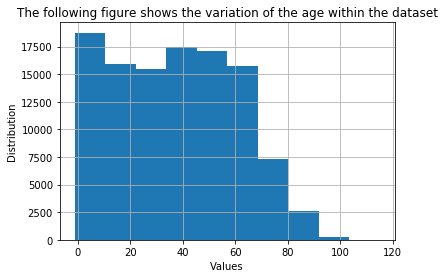

In [6]:
# Displaying the variatin in sample Age
df['Age'].hist();
plt.xlabel('Values')
plt.ylabel('Distribution' )
plt.title('The following figure shows the variation of the age within the dataset')
plt.show()
#In the next graph we are depicting the variation in the Age variable among different patients for better understanding for 
# what this variable resemble in this study.The following graph is chosen to resemble this variation.

In [51]:
df['Gender'].describe()

count     110527
unique         2
top            F
freq       71840
Name: Gender, dtype: object

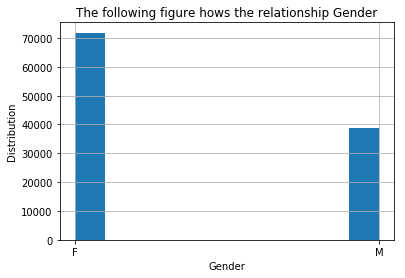

In [7]:
# Displaying the variatin in sample Age

df['Gender'].hist();
plt.xlabel('Gender')
plt.ylabel('Distribution' )
plt.title('The following figure hows the relationship Gender')
plt.show()
#The following graph represent the variation in the Gender variable which is an important factor for the study
#It does show how The Female are more dominiant than men in the study>The plot graph is used due its clear resemblence for the 
#required representation

In [22]:
#Examining the number of Females in this examination
df_female=df['Gender']=='F'

In [38]:
df_female.sum()

71840

In [23]:
#Examining the number of Males in this examination
df_male=df['Gender']=='M'


In [45]:
#Number of males in the dataset
df_male.sum()

38687

In [24]:
df_diabetics=(df['Diabetes']==0)

In [25]:
#Summing the number of diabetics in the dataset
df_diabetics.sum()

102584

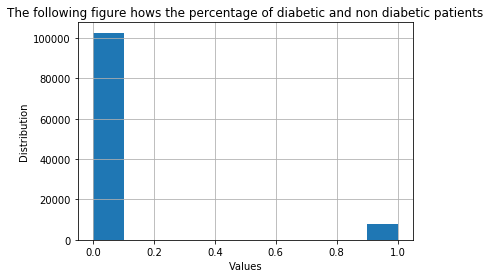

In [8]:
# showing the diabetes patient histogram
df['Diabetes'].hist()
plt.xlabel('Values')
plt.ylabel('Distribution' )
plt.title('The following figure hows the percentage of diabetic and non diabetic patients')
plt.show()
#In the following histogram we are representing the percentage of Diabetics and non-diabetics patients within the study and the value distribution within the studyset

In [86]:
#Examining Female non-diabetic patients 
df_female_diabetics=df[(df['Diabetes']==0)&(df['Gender']=='F')]

In [57]:
# showing the female non diabetic patients 
df_female_diabetics.count()

PatientId         66234
AppointmentID     66234
Gender            66234
ScheduledDay      66234
AppointmentDay    66234
Age               66234
Neighbourhood     66234
Scholarship       66234
Hipertension      66234
Diabetes          66234
Alcoholism        66234
Handcap           66234
SMS_received      66234
No-show           66234
dtype: int64

In [21]:
#counting the number of Males non- diabetics patients
df[(df['Diabetes']==0)&(df['Gender']=='M')].count()

PatientId         36350
AppointmentID     36350
Gender            36350
ScheduledDay      36350
AppointmentDay    36350
Age               36350
Neighbourhood     36350
Scholarship       36350
Hipertension      36350
Diabetes          36350
Alcoholism        36350
Handcap           36350
SMS_received      36350
No-show           36350
dtype: int64

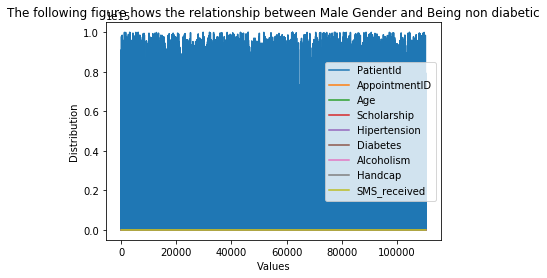

In [9]:
#showing graphics describing non diabetics Male patient 
df_analysis1=df[(df['Diabetes']==0)&(df['Gender']=='M')].plot()
plt.xlabel('Values')
plt.ylabel('Distribution' )
plt.title('The following figure hows the relationship between Male Gender and Being non diabetic')
plt.show()

#In the following graph we are representing the distribution on of the non-diabetic msle patients in the dataset .
#The gained resuults will be used to compare it with 
#male non-diabetics in order to gain better deduction in knowledge of study

In [6]:
#counting the number of Male diabetics patients
df[(df['Diabetes']==1)&(df['Gender']=='M')].count()

PatientId         2337
AppointmentID     2337
Gender            2337
ScheduledDay      2337
AppointmentDay    2337
Age               2337
Neighbourhood     2337
Scholarship       2337
Hipertension      2337
Diabetes          2337
Alcoholism        2337
Handcap           2337
SMS_received      2337
No-show           2337
dtype: int64

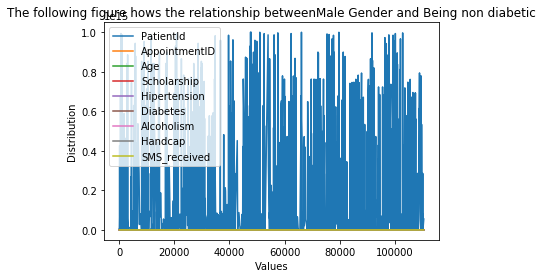

In [17]:
df[(df['Diabetes']==1)&(df['Gender']=='M')].plot()
plt.xlabel('Values')
plt.ylabel('Distribution' )
plt.title('The following figure hows the relationship betweenMale Gender and Being non diabetic')
plt.show()
#The following figure represents the results of analysing the diabetic males and their distribution and values among the dataset

In [7]:
#counting the number of Female diabetics patients
df[(df['Diabetes']==0)&(df['Gender']=='F')].count()

PatientId         66234
AppointmentID     66234
Gender            66234
ScheduledDay      66234
AppointmentDay    66234
Age               66234
Neighbourhood     66234
Scholarship       66234
Hipertension      66234
Diabetes          66234
Alcoholism        66234
Handcap           66234
SMS_received      66234
No-show           66234
dtype: int64

In [8]:
#counting the number of female diabetics patients
df[(df['Diabetes']==1)&(df['Gender']=='F')].count()

PatientId         5606
AppointmentID     5606
Gender            5606
ScheduledDay      5606
AppointmentDay    5606
Age               5606
Neighbourhood     5606
Scholarship       5606
Hipertension      5606
Diabetes          5606
Alcoholism        5606
Handcap           5606
SMS_received      5606
No-show           5606
dtype: int64

### Research Question 2  (Examining the correlation between 'Gender' and 'no-show'

In [9]:
# Examining the number of Male patients who did  show for their appointments
df[(df['No-show']=='No')&(df['Gender']=='M')].count()

PatientId         30962
AppointmentID     30962
Gender            30962
ScheduledDay      30962
AppointmentDay    30962
Age               30962
Neighbourhood     30962
Scholarship       30962
Hipertension      30962
Diabetes          30962
Alcoholism        30962
Handcap           30962
SMS_received      30962
No-show           30962
dtype: int64

In [10]:
# Examining the number of Male patients who did not show for their appointments
df[(df['No-show']=='Yes')&(df['Gender']=='M')].count()

PatientId         7725
AppointmentID     7725
Gender            7725
ScheduledDay      7725
AppointmentDay    7725
Age               7725
Neighbourhood     7725
Scholarship       7725
Hipertension      7725
Diabetes          7725
Alcoholism        7725
Handcap           7725
SMS_received      7725
No-show           7725
dtype: int64

In [11]:
# Examining the number of Female patients who did  show for their appointments
df[(df['No-show']=='Yes')&(df['Gender']=='F')].count()

PatientId         14594
AppointmentID     14594
Gender            14594
ScheduledDay      14594
AppointmentDay    14594
Age               14594
Neighbourhood     14594
Scholarship       14594
Hipertension      14594
Diabetes          14594
Alcoholism        14594
Handcap           14594
SMS_received      14594
No-show           14594
dtype: int64

In [12]:
# Examining the number of Female patients who did  show for their appointments
df[(df['No-show']=='No')&(df['Gender']=='F')].count()

PatientId         57246
AppointmentID     57246
Gender            57246
ScheduledDay      57246
AppointmentDay    57246
Age               57246
Neighbourhood     57246
Scholarship       57246
Hipertension      57246
Diabetes          57246
Alcoholism        57246
Handcap           57246
SMS_received      57246
No-show           57246
dtype: int64

In [13]:
# Examining the number of Female patients who did  show for their appointments and donot suffer diabetes.
df[(df['No-show']=='No')&(df['Gender']=='F')&(df['Diabetes']==0)].count()

PatientId         52657
AppointmentID     52657
Gender            52657
ScheduledDay      52657
AppointmentDay    52657
Age               52657
Neighbourhood     52657
Scholarship       52657
Hipertension      52657
Diabetes          52657
Alcoholism        52657
Handcap           52657
SMS_received      52657
No-show           52657
dtype: int64

In [14]:
# Examining the number of Female patients who did  show for their appointments and do suffer diabetes.
df[(df['No-show']=='No')&(df['Gender']=='F')&(df['Diabetes']==1)].count()

PatientId         4589
AppointmentID     4589
Gender            4589
ScheduledDay      4589
AppointmentDay    4589
Age               4589
Neighbourhood     4589
Scholarship       4589
Hipertension      4589
Diabetes          4589
Alcoholism        4589
Handcap           4589
SMS_received      4589
No-show           4589
dtype: int64

In [16]:
# Examining the number of Female patients who did not show for their appointments and donot suffer diabetes.
df[(df['No-show']=='Yes')&(df['Gender']=='F')&(df['Diabetes']==0)].count()

PatientId         13577
AppointmentID     13577
Gender            13577
ScheduledDay      13577
AppointmentDay    13577
Age               13577
Neighbourhood     13577
Scholarship       13577
Hipertension      13577
Diabetes          13577
Alcoholism        13577
Handcap           13577
SMS_received      13577
No-show           13577
dtype: int64

In [17]:
# Examining the number of Female patients who did not show for their appointments and do suffer diabetes.
df[(df['No-show']=='Yes')&(df['Gender']=='F')&(df['Diabetes']==1)].count()

PatientId         1017
AppointmentID     1017
Gender            1017
ScheduledDay      1017
AppointmentDay    1017
Age               1017
Neighbourhood     1017
Scholarship       1017
Hipertension      1017
Diabetes          1017
Alcoholism        1017
Handcap           1017
SMS_received      1017
No-show           1017
dtype: int64

<a id='conclusions'></a>
## Conclusions

> After analysing the dataset and making different examination the data analysis showed that 
Males with no diabetes :26350
Males with dibetes:2337
Females with no diabetes:66234
Females with Diabetes:5606
-------------------------------

Females that did show for their appointments:57246
Females that didnot show for their appointments:14594
Males that did show for their appointments:30962
Females did show for their appointments more than men
Males that didnot show for their appointments:7725

----------------------------------------------------------
Females with no-diabetes that did show for their appointment:52657
Females with diabetes that did show for their appointments:4589
Females with no-diabetes  that didnot show for their appointments:13577
Females with diabetes that didnot show for their appointments:1017
Diabetes didnot affect the show in of female with diabetes.

# Limitations
some limitations occureed on the analysis of some variables concerning the relation between some variables like Hypertension and alcoholic
It was difficultto correlate between the medical situation of the patient an some demographics data such as neighbourhood.




In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])